In [24]:
import numpy as np
import pandas as pd
import os
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
import seaborn as sns
import matplotlib.pyplot as plt

### Devide training and tests datasets into different folders (25:5) and replacing inf and nan with median and deleting serive subcarriers

In [25]:
files = ['brushteeth_', 'cook_', 'drink_', 'getintobed_', 'nothing_', 'sitdown_chair_', 'sitdown_sofa_', 'sleeping_', 
             'standup_chair_', 'standup_sofa_', 'walk_', 'washingdishes_']

train_list = []
test_list = []
# service subcarriers
service  = [str(i) for i in np.array([0, 1] + list(range(123, 134))+ [255])]

for file in files:
    for i in range(25):
        df = pd.read_csv(f'data_csv/{file} ({i+1}).csv')
        df.replace([np.inf, -np.inf], np.nan, inplace=True)
        df.replace(np.nan, df.mean().mean(), inplace=True)
        df.drop(columns=service, inplace=True)
        train_list.append(df)
        df.to_csv(f'training_csv/{file} ({i+1}).csv', index=False)
    for i in range(25, 30):
        df = pd.read_csv(f'data_csv/{file} ({i+1}).csv')
        df.replace([np.inf, -np.inf], np.nan, inplace=True)
        df.replace(np.nan, df.mean().mean(), inplace=True)
        df.drop(columns=service, inplace=True)
        test_list.append(df)
        df.to_csv(f'test_csv/{file} ({i+1}).csv', index=False) 
        
    print(f'{file} activity done converting')
        

brushteeth_ activity done converting
cook_ activity done converting
drink_ activity done converting
getintobed_ activity done converting
nothing_ activity done converting
sitdown_chair_ activity done converting
sitdown_sofa_ activity done converting
sleeping_ activity done converting
standup_chair_ activity done converting
standup_sofa_ activity done converting
walk_ activity done converting
washingdishes_ activity done converting


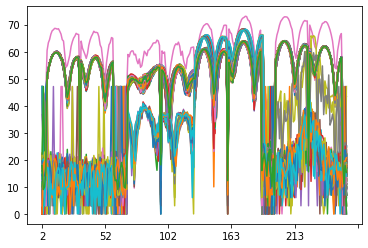

In [15]:
csi_matrix = train_list[0]
for i in range(len(csi_matrix)):
    csi_matrix.iloc[i].plot.line()
    

## Normalize training dataset  

In [26]:
train_list_norm = []
scaler = StandardScaler()
for file in train_list:
    df_norm = pd.DataFrame(scaler.fit_transform(file), columns = file.columns)
    train_list_norm.append(df_norm)

In [27]:
test_list_norm = []
scaler = StandardScaler()
for file in test_list:
    df_norm = pd.DataFrame(scaler.fit_transform(file), columns = file.columns)
    test_list_norm.append(df_norm)

In [28]:
train_list_norm[5]

,2,3,4,5,6,7,8,9,10,11,...,245,246,247,248,249,250,251,252,253,254
0,-1.663625,1.084472,-0.371408,0.266824,0.391234,0.366832,0.300077,0.306582,0.315984,0.320330,...,0.337446,0.206106,0.299079,0.302143,0.343720,0.326407,0.055326,0.760991,1.303888,0.623018
1,0.932804,-0.083990,-0.189129,0.630706,0.420720,0.377506,0.316042,0.324258,0.326698,0.324248,...,0.448632,0.062212,0.166953,0.263622,0.329825,0.307649,0.270577,0.676497,-1.185461,-0.024222
2,-1.029119,0.477618,0.473294,-0.104914,0.281932,0.293968,0.339878,0.343825,0.328554,0.319688,...,0.072903,0.381840,0.338431,0.344442,0.286419,0.294424,-0.860106,-0.065730,0.456433,1.747087
3,-1.183640,0.640195,0.559360,0.266824,0.300771,0.307783,0.336580,0.325615,0.327299,0.313203,...,0.128099,0.312030,0.310946,0.323637,0.293592,0.299696,-0.316620,-0.326705,-0.152422,1.132722
4,0.747038,0.583767,0.721795,0.459219,0.369327,0.353523,0.308245,0.316292,0.310794,0.317832,...,0.367218,0.273479,0.288790,0.316817,0.334294,0.320937,0.088469,1.040983,0.394875,0.358729
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335,-0.622093,-0.695463,-0.937617,0.143028,-3.154051,-2.944300,-3.123089,-4.096336,-3.426617,-3.044079,...,-2.735821,-3.992888,-3.843830,-2.530145,-4.806421,-3.388665,0.077635,-1.503379,-0.219188,0.137273
336,1.307400,-0.520378,0.473294,0.459219,0.210771,0.258949,0.323696,0.306034,0.313153,0.302530,...,-0.012394,0.418420,0.384619,0.344742,0.291664,0.297580,-0.071595,0.757700,-0.344782,0.521414
337,-1.663625,-1.158024,-0.937617,1.247054,0.314958,0.298352,0.316555,0.319441,0.319590,0.317462,...,0.269867,0.278733,0.323268,0.325323,0.287504,0.304238,-0.525778,0.179492,-0.174056,0.766203
338,-2.143611,-0.844374,1.529671,1.335963,0.309035,0.330116,0.325471,0.336205,0.319985,0.325229,...,0.336833,0.257169,0.274555,0.285674,0.288646,0.306648,0.077635,-1.915094,1.187777,-0.161437


In [29]:
test_list_norm[5]

,2,3,4,5,6,7,8,9,10,11,...,245,246,247,248,249,250,251,252,253,254
0,-0.957502,1.080339,0.752771,0.655355,0.308316,0.317867,0.289847,0.307873,0.303476,0.317686,...,0.421463,0.155582,0.220734,0.272357,0.318794,0.301303,0.607383,0.043201,0.359580,-0.093479
1,-0.056873,0.829177,0.365081,0.569632,0.227311,0.286038,0.318285,0.322169,0.306954,0.308070,...,0.052854,0.484501,0.393135,0.359865,0.311455,0.308905,1.122234,-0.081271,1.154191,0.718089
2,-0.575637,0.689465,-1.350175,0.485480,-3.517575,-2.763560,-3.966014,-4.172346,-3.569033,-2.796858,...,-2.999634,-2.762335,-2.921261,-4.621829,-3.050503,-3.204382,-1.500744,-0.801708,-3.090571,0.074456
3,-0.162456,-0.250261,0.181018,0.375867,0.310856,0.321400,0.309389,0.317961,0.311733,0.309815,...,0.251164,0.515176,0.412588,0.338411,0.335706,0.311309,-0.158769,1.239972,0.541462,-0.160182
4,0.409484,-0.613280,1.278133,1.052577,0.340204,0.290399,0.301896,0.296715,0.303666,0.306762,...,0.412428,0.519780,0.426858,0.380348,0.356358,0.324099,0.249286,0.772751,1.067110,0.137534
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333,-0.336738,-0.613280,-0.022608,-0.977553,0.285171,0.268378,0.297514,0.294165,0.297692,0.291424,...,0.274158,0.345659,0.327471,0.306848,0.303129,0.289601,-0.680213,-0.966268,0.142735,-1.351312
334,0.667598,0.742987,-0.962486,-0.465641,0.267927,0.290269,0.335371,0.320939,0.306251,0.297596,...,0.261206,0.280153,0.295942,0.311781,0.263257,0.270582,0.487446,0.839619,-1.371903,-0.052399
335,0.409484,0.196897,0.849926,0.569632,0.375741,0.333130,0.308189,0.302986,0.285875,0.292979,...,0.443367,0.223713,0.242262,0.262737,0.277967,0.271820,-1.185610,0.337997,1.371036,-1.351312
336,-0.056873,-0.029168,-0.562008,-0.107078,0.278080,0.287231,0.313409,0.302916,0.299954,0.286445,...,0.328215,0.426794,0.319322,0.299992,0.249916,0.252411,-0.680213,-0.298462,0.628543,0.544134


## Concatenate every dataframe 

In [30]:
concat_train_list_norm = pd.concat(train_list_norm)
concat_train_list_norm

,2,3,4,5,6,7,8,9,10,11,...,245,246,247,248,249,250,251,252,253,254
0,0.885691,-0.109777,0.750845,-0.887268,0.237856,0.303826,0.328241,0.337434,0.324063,0.321743,...,-0.058637,0.439990,0.369826,0.342783,0.303335,0.315024,-0.885585,0.511908,0.377410,0.794572
1,0.292936,-1.321834,0.234324,0.597262,0.302293,0.313851,0.335471,0.326547,0.336866,0.321596,...,0.195903,0.372720,0.365751,0.329560,0.318567,0.325866,0.074634,0.844296,-0.276394,0.120128
2,-1.069072,0.185467,0.750845,0.552255,0.332631,0.325537,0.287891,0.305692,0.320066,0.313181,...,0.235107,0.340741,0.308424,0.319498,0.366770,0.335178,-1.064849,0.564110,0.948396,-0.321515
3,-0.266561,-0.879176,1.693137,-1.378448,-3.074421,-2.829133,-3.083651,-3.183905,-3.339994,-2.726185,...,-2.422758,-2.823934,-2.508514,-3.097488,-2.970988,-3.661824,-0.702290,0.142866,0.501087,0.416178
4,-1.701263,0.244179,-1.293592,-0.079837,0.359448,0.322722,0.323037,0.311224,0.319888,0.311272,...,0.378259,0.317930,0.329795,0.330134,0.317271,0.306831,1.197125,-1.092856,0.670901,0.762996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348,0.098514,1.140087,1.401455,1.141167,0.354597,0.338360,0.303486,0.330239,0.343783,0.362238,...,0.402673,0.326157,0.344378,0.348431,0.372458,0.363444,-1.518502,-0.751173,-1.542793,-1.014887
349,0.409046,-2.330107,0.054037,1.712742,0.189585,0.287471,0.358916,0.374553,0.361599,0.356143,...,0.156134,0.368594,0.374524,0.348202,0.346848,0.363491,-1.518502,0.527153,0.328379,0.174406
350,-1.025499,0.650508,0.054037,-0.379248,0.263123,0.330104,0.379868,0.368396,0.377325,0.365288,...,0.011963,0.303991,0.350886,0.338652,0.331786,0.337698,-1.172322,-0.444853,-1.693388,0.401622
351,-2.122772,-0.639868,-2.082485,0.022490,0.456580,0.430545,0.407176,0.381034,0.394362,0.379562,...,0.093948,0.238305,0.340226,0.337071,0.352481,0.344912,-1.007966,-0.200628,-2.628974,-0.228120


## Applying PCA

In [31]:
pca = PCA(0.82)
pca.fit(concat_train_list_norm)
print(pca.explained_variance_ratio_)
print(len(pca.explained_variance_ratio_))

[0.6989921  0.07452666 0.01981869 0.01443932 0.00880291 0.00837207]
6


In [32]:
for ind, file in enumerate(os.listdir('training_csv')):
    df_pca = pd.DataFrame(pca.transform(train_list_norm[ind]))
    df_pca.to_csv("training_pca_csv/" + file, index=False)

print('folder with train pca data is created')

folder with train pca data is created


In [33]:
for ind, file in enumerate(os.listdir('test_csv')):
    df_pca = pd.DataFrame(pca.transform(train_list_norm[ind]))
    df_pca.to_csv("test_pca_csv/" + file, index=False)

print('folder with test pca data is created')

folder with test pca data is created
